In [1]:
import pandas as pd
import tensorflow as tf
from transformers import TFBertForSequenceClassification, BertTokenizer
from sklearn.model_selection import train_test_split
import numpy as np
import mlflow
import mlflow.tensorflow
import pickle
import time
import dl
import utils
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

2025-01-13 15:06:44.601500: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/hedredo/miniconda310/envs/p7_tf_cpu/lib/python3.10/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/home/hedredo/miniconda310/envs/p7_tf_cpu/lib/python3.10/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


## BERT: Bidirectional Encoder Representations from Transformers

## Fonctions de transformation pour BERT

In [2]:
# Tokenisation et encodage des textes en un format compatible avec BERT
def tokenize_texts(
    texts, tokenizer, max_length=128
):  # Laisson la taille comme le Tokenizer de BERT a une méthode de tokenisation spécifique
    return tokenizer(
        texts,
        padding="max_length",
        truncation=True,
        max_length=max_length,
        return_tensors="tf",
    )

In [3]:
def transform_data_for_bert(X, y, col_name, tokenizer):
    # Convertir les données en liste
    texts = (
        X[col_name].str.lower().tolist()
    )  # S'assure que les données sont en minimuscules
    labels = y.tolist()

    # Stocker les transformations avec l'encoder
    input_ids = []
    attention_masks = []
    for text in texts:
        encoded = tokenize_texts([text], tokenizer)
        input_ids.append(encoded["input_ids"])
        attention_masks.append(encoded["attention_mask"])
    input_ids = np.asarray(input_ids)
    attention_masks = np.asarray(attention_masks)
    labels = np.array(labels)

    # Retourner les données
    return input_ids, attention_masks, labels

## Run avec le text uniquement en lowercase

In [4]:
# Load the pickle file containing the columns
with open("../data/processed/train_columns.pkl", "rb") as f:
    cols = pickle.load(f)

# Load the parquet file
X_train_full = pd.read_pickle("../data/processed/X_train.pickle")
X_test_full = pd.read_pickle("../data/processed/X_test.pickle")
y_train = pd.read_pickle("../data/processed/y_train.pickle")
y_test = pd.read_pickle("../data/processed/y_test.pickle")


# Set fixed variables
SEED = 314
np.random.seed(SEED)
URI = "http://localhost:5000"

/home/hedredo/miniconda310/envs/p7_tf_cpu/lib/python3.10/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
2025-01-13 15:07:10.807378: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-13 15:07:10.808957: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 

(19036, 1, 128) (4759, 1, 128) (19036,) (4759,) (19036, 1, 128) (4759, 1, 128)


2025/01/13 15:07:19 WARNING mlflow.data.tensorflow_dataset: Failed to infer schema for TensorFlow dataset. Exception: Failed to infer schema for tf.data.Dataset. Schemas can only be inferred if the dataset consists of tensors. Ragged tensors, tensor arrays, and other types are not supported. Additionally, datasets with nested tensors are not supported.
2025/01/13 15:07:19 WARNING mlflow.data.tensorflow_dataset: Failed to infer schema for TensorFlow dataset. Exception: Failed to infer schema for tf.data.Dataset. Schemas can only be inferred if the dataset consists of tensors. Ragged tensors, tensor arrays, and other types are not supported. Additionally, datasets with nested tensors are not supported.


Epoch 1/3
744/744 [==============================] - 5363s 7s/step - loss: 0.4292 - accuracy: 0.8047 - val_loss: 0.2869 - val_accuracy: 0.9021
Epoch 2/3
744/744 [==============================] - 5364s 7s/step - loss: 0.2689 - accuracy: 0.8965 - val_loss: 0.1472 - val_accuracy: 0.9498
Epoch 3/3
1/1 [==============================] - 2s 2s/step


2025/01/13 19:33:44 WARNING mlflow.tensorflow: Failed to infer model signature: 'TFSequenceClassifierOutput' object has no attribute '__name__'
2025/01/13 19:33:44 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: /tmp/tmpqboiti37/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpqboiti37/model/data/model/assets
2025/01/13 19:34:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Evaluate on validation data
186/186 [==============================] - 467s 2s/step


,negative,positive,macro avg
precision,0.808777,0.854657,0.831717
recall,0.865481,0.794474,0.829978
f1-score,0.836169,0.823468,0.829818
support,2981.000000,2968.000000,5949.000000


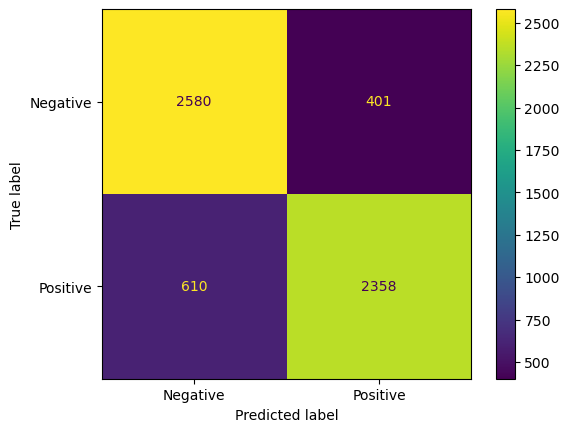

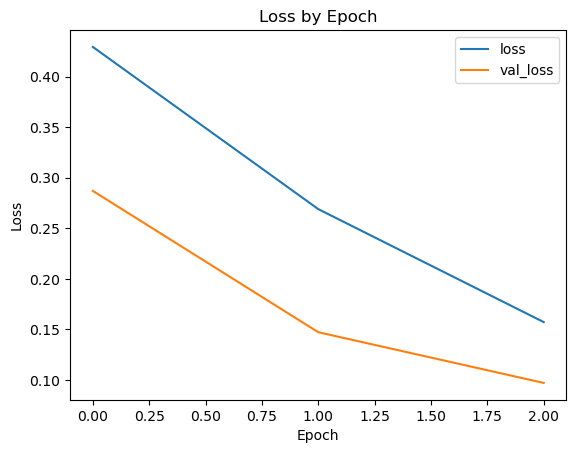

🏃 View run bert_sentiment_classification_raw_text at: http://localhost:5000/#/experiments/15/runs/36de1cc4b008489d97ed41d88f485174
🧪 View experiment at: http://localhost:5000/#/experiments/15


In [7]:
# Define the URI of the MLflow server and the name of the experiment & check if the prepared dataset is in the columns
experiment = "p7_bert_model"

# Set the tracking URI
mlflow.set_tracking_uri(URI)
# try to connect to the server
try:
    mlflow.tracking.get_tracking_uri()
except Exception as e:
    print(f"Cannot connect to the server : {URI}. Check the server status.")
    raise e
# Set, and create if necessary, the experiment
try:
    mlflow.create_experiment(experiment)
except Exception:
    pass
finally:
    mlflow.set_experiment(experiment)


# Charger le tokenizer et le modèle BERT pour la classification
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=2)
col_name = "text"

# Encode le train et le test
train_full_input_ids, train_full_attention_masks, train_full_labels = (
    transform_data_for_bert(X_train_full, y_train, col_name, tokenizer)
)

test_input_ids, test_attention_masks, test_labels = transform_data_for_bert(
    X_test_full, y_test, col_name, tokenizer
)

# Vérifie les tailles
len(train_full_input_ids), len(train_full_attention_masks), len(train_full_labels)
# Séparer les ensembles de données
train_input_ids, val_input_ids, train_labels, val_labels, train_masks, val_masks = (
    train_test_split(
        train_full_input_ids,
        train_full_labels,
        train_full_attention_masks,
        test_size=0.2,
        random_state=314,
    )
)
# Vérifier les formes
print(
    train_input_ids.shape,
    val_input_ids.shape,
    train_labels.shape,
    val_labels.shape,
    train_masks.shape,
    val_masks.shape,
)

# Batch size
batch_size = 32
# Prépare les datasets
train_dataset = tf.data.Dataset.from_tensor_slices(
    (
        {
            "input_ids": train_full_input_ids.squeeze(),
            "attention_mask": train_full_attention_masks.squeeze(),
        },
        train_full_labels,
    )
).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices(
    (
        {
            "input_ids": val_input_ids.squeeze(),
            "attention_mask": val_masks.squeeze(),
        },
        val_labels,
    )
).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices(
    (
        {
            "input_ids": test_input_ids.squeeze(),
            "attention_mask": test_attention_masks.squeeze(),
        },
        test_labels,
    )
).batch(batch_size)

# Compile le modèle
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy("accuracy")
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5, epsilon=1e-08)
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Entraînement du modèle
epochs = 3

# Start the MLflow run & autolog
mlflow.tensorflow.autolog(checkpoint=False, log_models=True, log_datasets=True)
with mlflow.start_run(run_name="bert_sentiment_classification_raw_text") as active_run:
    # Entraine le modèle
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=epochs,
    )

    # Evaluate the model
    print("Evaluate on validation data")
    print("==============")
    start_time = time.time()
    loss, accuracy = model.evaluate(test_dataset)
    inference_time = time.time() - start_time
    y_pred = model.predict([test_input_ids.squeeze(), test_attention_masks.squeeze()])
    predictions = np.argmax(y_pred.logits, axis=1)
    # Log classification report as artifact on mlflow
    report = classification_report(
        y_test, predictions, output_dict=True, target_names=["negative", "positive"]
    )
    report_df = pd.DataFrame(report).filter(["negative", "positive", "macro avg"])
    display(report_df)
    report_df.to_csv("classification_report.csv")
    mlflow.log_artifact("classification_report.csv")
    # Use ConfustionMatrixDisplay and save it as png as an artifact on mflow
    cm = ConfusionMatrixDisplay.from_predictions(
        y_test, predictions, display_labels=["Negative", "Positive"]
    )
    cm.figure_.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    # Plot the loss and accuracy by epoch
    dl.plot_loss(history).figure.savefig("loss_by_epoch.png")
    mlflow.log_artifact("loss_by_epoch.png")
    plt.show()
    # Récupère les métriques avec le meilleur val_loss
    best_val_loss = np.array(history.history["val_loss"])
    indice_best_val_loss = int(np.argmin(best_val_loss))
    mlflow.log_metrics(
        {
            "log_loss": loss,
            "val_loss": history.history["val_loss"][indice_best_val_loss],
            "accuracy_score": accuracy,
            "val_accuracy": history.history["val_accuracy"][indice_best_val_loss],
            "inference_time": inference_time,
        }
    )
    mlflow.log_params(
        {
            "data_preparation": col_name,
            "learning_rate": 5e-5,
            "batch_size_": batch_size,
            "standardization": "lowercase",
            "test_size_ratio": 0.2,
            "validation_split_": 0.2,
            "pretrained_weights": model_name,
        }
    )


In [9]:
# Load the pickle file containing the columns
with open("../data/processed/train_columns.pkl", "rb") as f:
    cols = pickle.load(f)

# Load the parquet file
X_train_full = pd.read_pickle("../data/processed/X_train.pickle")
X_train_full["text"] = X_train_full["text"].transform(
    lambda x: utils.text_preprocessing(x, remove_punct_and_digits=False)
)
X_test_full = pd.read_pickle("../data/processed/X_test.pickle")
X_test_full["text"] = X_test_full["text"].transform(
    lambda x: utils.text_preprocessing(x, remove_punct_and_digits=False)
)
y_train = pd.read_pickle("../data/processed/y_train.pickle")
y_test = pd.read_pickle("../data/processed/y_test.pickle")

# Set fixed variables
SEED = 314
np.random.seed(SEED)
URI = "http://localhost:5000"

/home/hedredo/miniconda310/envs/p7_tf_cpu/lib/python3.10/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
2025-01-13 13:33:00.192976: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-13 13:33:00.194427: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 

(102, 1, 128) (26, 1, 128) (102,) (26,) (102, 1, 128) (26, 1, 128)
Epoch 1/3
4/4 [==============================] - 41s 8s/step - loss: 0.7099 - accuracy: 0.4844 - val_loss: 0.6113 - val_accuracy: 0.8077
Epoch 2/3
4/4 [==============================] - 29s 7s/step - loss: 0.6316 - accuracy: 0.7734 - val_loss: 0.5532 - val_accuracy: 0.8462
Epoch 3/3
1/1 [==============================] - 2s 2s/step


2025/01/13 13:35:06 WARNING mlflow.tensorflow: Failed to infer model signature: 'TFSequenceClassifierOutput' object has no attribute '__name__'
2025/01/13 13:35:06 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: /tmp/tmph10qnkyk/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmph10qnkyk/model/data/model/assets
2025/01/13 13:35:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Evaluate on validation data
4/4 [==============================] - 12s 3s/step - loss: 0.6454 - accuracy: 0.6328


2025-01-13 13:35:54.838760: E tensorflow/core/framework/node_def_util.cc:675] NodeDef mentions attribute epsilon which is not in the op definition: Op<name=_MklFusedBatchMatMulV2; signature=x:T, y:T, args:num_args*T -> output:T; attr=T:type,allowed=[DT_BFLOAT16, DT_FLOAT]; attr=adj_x:bool,default=false; attr=adj_y:bool,default=false; attr=num_args:int,min=0; attr=fused_ops:list(string),default=[]> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node tf_bert_for_sequence_classification/bert/encoder/layer_._0/attention/self/ArithmeticOptimizer/AddOpsRewrite_add_1}}


4/4 [==============================] - 11s 3s/step


,negative,positive,macro avg
precision,0.733333,0.578313,0.655823
recall,0.485294,0.800000,0.642647
f1-score,0.584071,0.671329,0.627700
support,68.000000,60.000000,128.000000


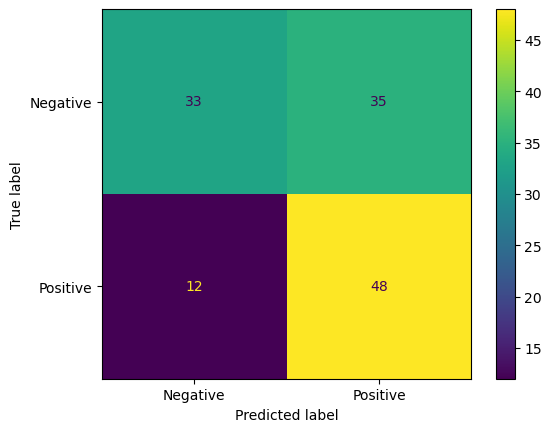

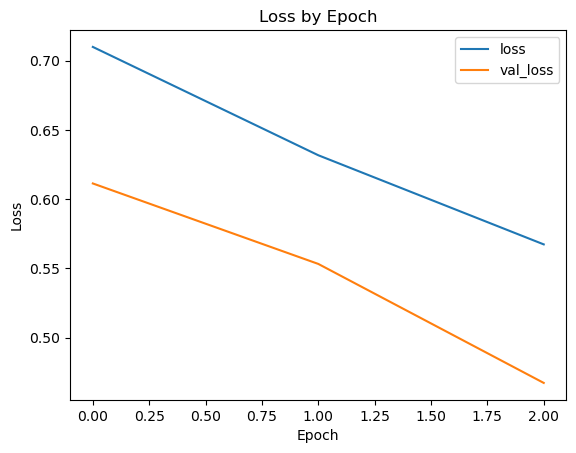

🏃 View run bert_sentiment_classification at: http://localhost:5000/#/experiments/14/runs/b6ac82ea9fbe40c6adfe5e25c0d97317
🧪 View experiment at: http://localhost:5000/#/experiments/14


In [ ]:
# Define the URI of the MLflow server and the name of the experiment & check if the prepared dataset is in the columns
experiment = "p7_bert_model"

# Set the tracking URI
mlflow.set_tracking_uri(URI)
# try to connect to the server
try:
    mlflow.tracking.get_tracking_uri()
except Exception as e:
    print(f"Cannot connect to the server : {URI}. Check the server status.")
    raise e
# Set, and create if necessary, the experiment
try:
    mlflow.create_experiment(experiment)
except Exception:
    pass
finally:
    mlflow.set_experiment(experiment)


# Charger le tokenizer et le modèle BERT pour la classification
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=2)
col_name = "text"

# Encode le train et le test
train_full_input_ids, train_full_attention_masks, train_full_labels = (
    transform_data_for_bert(X_train_full, y_train, col_name, tokenizer)
)
test_input_ids, test_attention_masks, test_labels = transform_data_for_bert(
    X_test_full, y_test, col_name, tokenizer
)

# Vérifie les tailles
len(train_full_input_ids), len(train_full_attention_masks), len(train_full_labels)
# Séparer les ensembles de données
train_input_ids, val_input_ids, train_labels, val_labels, train_masks, val_masks = (
    train_test_split(
        train_full_input_ids,
        train_full_labels,
        train_full_attention_masks,
        test_size=0.2,
        random_state=314,
    )
)
# Vérifier les formes
print(
    train_input_ids.shape,
    val_input_ids.shape,
    train_labels.shape,
    val_labels.shape,
    train_masks.shape,
    val_masks.shape,
)

# Batch size
batch_size = 32
# Prépare les datasets
train_dataset = tf.data.Dataset.from_tensor_slices(
    (
        {
            "input_ids": train_full_input_ids.squeeze(),
            "attention_mask": train_full_attention_masks.squeeze(),
        },
        train_full_labels,
    )
).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices(
    (
        {
            "input_ids": val_input_ids.squeeze(),
            "attention_mask": val_masks.squeeze(),
        },
        val_labels,
    )
).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices(
    (
        {
            "input_ids": test_input_ids.squeeze(),
            "attention_mask": test_attention_masks.squeeze(),
        },
        test_labels,
    )
).batch(batch_size)

# Compile le modèle
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy("accuracy")
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5, epsilon=1e-08)
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Entraînement du modèle
epochs = 3

# Start the MLflow run & autolog
mlflow.tensorflow.autolog(checkpoint=False, log_models=True, log_datasets=True)
with mlflow.start_run(
    run_name="bert_sentiment_classification_preprocess_text"
) as active_run:
    # Entraine le modèle
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=epochs,
    )

    # Evaluate the model
    print("Evaluate on validation data")
    print("==============")
    start_time = time.time()
    loss, accuracy = model.evaluate(test_dataset)
    inference_time = time.time() - start_time
    y_pred = model.predict([test_input_ids.squeeze(), test_attention_masks.squeeze()])
    predictions = np.argmax(y_pred.logits, axis=1)
    # Log classification report as artifact on mlflow
    report = classification_report(
        y_test, predictions, output_dict=True, target_names=["negative", "positive"]
    )
    report_df = pd.DataFrame(report).filter(["negative", "positive", "macro avg"])
    display(report_df)
    report_df.to_csv("classification_report.csv")
    mlflow.log_artifact("classification_report.csv")
    # Use ConfustionMatrixDisplay and save it as png as an artifact on mflow
    cm = ConfusionMatrixDisplay.from_predictions(
        y_test, predictions, display_labels=["Negative", "Positive"]
    )
    cm.figure_.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    # Plot the loss and accuracy by epoch
    dl.plot_loss(history).figure.savefig("loss_by_epoch.png")
    mlflow.log_artifact("loss_by_epoch.png")
    plt.show()
    # Récupère les métriques avec le meilleur val_loss
    best_val_loss = np.array(history.history["val_loss"])
    indice_best_val_loss = int(np.argmin(best_val_loss))
    mlflow.log_metrics(
        {
            "log_loss": loss,
            "val_loss": history.history["val_loss"][indice_best_val_loss],
            "accuracy_score": accuracy,
            "val_accuracy": history.history["val_accuracy"][indice_best_val_loss],
            "inference_time": inference_time,
        }
    )
    mlflow.log_params(
        {
            "data_preparation": col_name,
            "learning_rate": 5e-5,
            "batch_size_": batch_size,
            "standardization": "custom_standardization_punct",
            "test_size_ratio": 0.2,
            "validation_split_": 0.2,
            "pretrained_weights": model_name,
        }
    )
